# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data #MNIST_data 불러오기
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

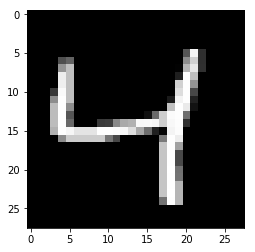

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, [None, image_size], name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu) #인코더
#tf.layers.dense : Functional interface for the densely-connected layer.
#tf.layers.dense를 사용하면 간단하게 신경망을 만들 수 있다. 파라미터는 (인풋, 출력 차원(아웃풋 사이즈)). 나머지는 모두 optional. Relu를 활성화함수로 FC
#https://www.tensorflow.org/api_docs/python/tf/layers/dense

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None) #디코더
#인코더의 결과값으로 로짓계산. 파라미터는 (인풋, 출력 차원(아웃풋 사이즈)). 나머지는 모두 optional. 시그모이드 따로 적용할 것이므로 활성함수는 None으로

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
#시그모이드로 손실 구하기

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost) #학습률. cost 최소가 되는 값으로 Adam 최적화

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer()) #초기화
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size) #배치 사이즈 만큼 다음 input과 target을 불러온다.
        feed = {inputs_: batch[0], targets_: batch[0]} #feed_dict에 값 넘겨줄 딕셔너리
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6906
Epoch: 1/20... Training loss: 0.6867
Epoch: 1/20... Training loss: 0.6825
Epoch: 1/20... Training loss: 0.6774
Epoch: 1/20... Training loss: 0.6713
Epoch: 1/20... Training loss: 0.6633
Epoch: 1/20... Training loss: 0.6545
Epoch: 1/20... Training loss: 0.6447
Epoch: 1/20... Training loss: 0.6338
Epoch: 1/20... Training loss: 0.6189
Epoch: 1/20... Training loss: 0.6057
Epoch: 1/20... Training loss: 0.5883
Epoch: 1/20... Training loss: 0.5727
Epoch: 1/20... Training loss: 0.5519
Epoch: 1/20... Training loss: 0.5387
Epoch: 1/20... Training loss: 0.5198
Epoch: 1/20... Training loss: 0.5014
Epoch: 1/20... Training loss: 0.4833
Epoch: 1/20... Training loss: 0.4717
Epoch: 1/20... Training loss: 0.4498
Epoch: 1/20... Training loss: 0.4305
Epoch: 1/20... Training loss: 0.4110
Epoch: 1/20... Training loss: 0.3991
Epoch: 1/20... Training loss: 0.3857
Epoch: 1/20... Training loss: 0.3730
Epoch: 1/20... Training loss: 0.3664
E

Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.2009
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1862
E

Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1518
E

Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1399
E

Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1254
E

Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1104
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1168
E

Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1074
E

Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1051
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1009
E

Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1044
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1020
E

Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0954
E

Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0987
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0886
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0887
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0885
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0877
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0877
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0865
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

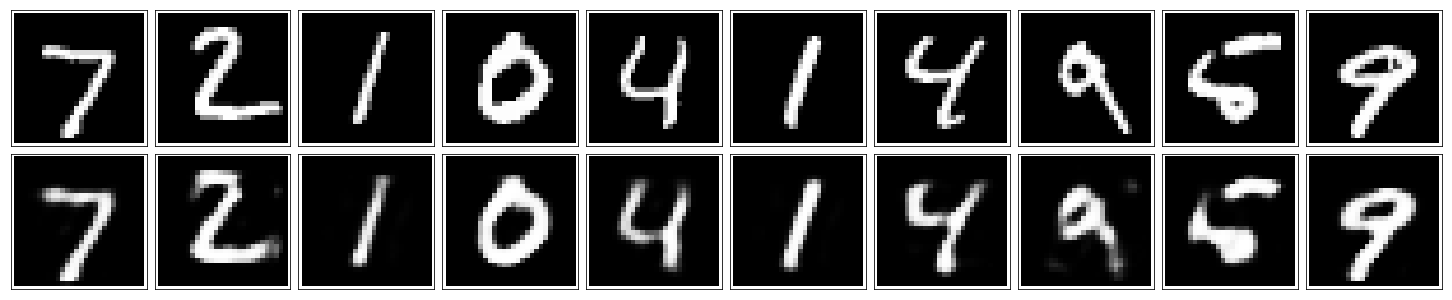

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.